# Note : THIS NOTEBOOK LOOKS DIFFERENT BECAUSE I HAVE TRIED DIFFERENT BATCH SIZES AND ADDED DROPOUTS TO THE PREVIOU NOTEBOOK ARCHITECTURE.

# I AM STILL FOLLOWING THE SAME ARCHITECTURE, BUT FOR DIFFERENT BATCH SIZES,I HAVE PUT EVERYTHING IN A FUNCTION.

# MNIST ASSIGNMENT:

We need to:

-  Follow same architecture.

  - it has less than 15000 parameters
  
  - it achieves validation accuracy of more than 99.4% (basically print(score) should be more than 0.994)

- Once done, upload the link to your Github Project to LMS.


## Getting things ready!

We set seed so not to lose our progress due to randomness.

We later on the following libraries:

1. Keras ([Keras Documentation](https://keras.io/)) :- Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
We import keras layers, model type Sequential (since we will be building a sequential model), and utils for plotting model and for converting single class to categorical 10 classes.

2. We also import Train_test_split, Model checkpoints to save the model and ImageDataGenerator just to create a batch flow into the network. **(We are not using any augumentation techniques & other tuning parameters)**.

The whole model is in itself is most basic & default.

In [0]:
import numpy as np
np.random.seed(25)

In [0]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from keras.models import (Sequential,
                          load_model)

from keras.layers import (Dropout,
                          Activation,
                          Flatten,Conv2D,
                          MaxPooling2D,
                          BatchNormalization)

from keras.utils import (np_utils,
                         plot_model)

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import datetime

from keras.datasets import mnist

## Load pre-shuffled MNIST data into Train set and Test set

After loading the Train and Test sets, we initially plot any one image from the Train set and see how the images really look like. 

We then reshape our data into 28x28x1, which would be input to our network. Here 28x28 is the image Height x Width and 1 is the number of channels. We also standardise our pixel (range: 0-255) values so as to obtain normally distributed pixel values between range 0-1, and also due to computational reasons.

We explore total number of digits on each class and then, convert our target variable into categorical 10 classes output, where each bit is set to 1 corresponding to the actual digit value. 

- Example: if the digit value is 6, then the 6th column is set to 1 and the rest 9 columns are set to 0.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


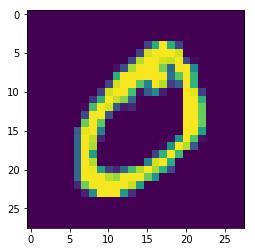

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Exploratary Data Analysis : 

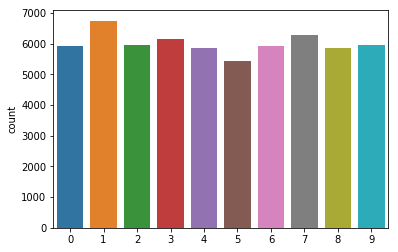

In [0]:
sns.countplot(y_train)

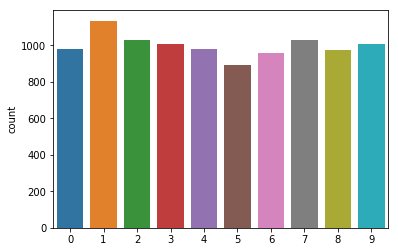

In [0]:
sns.countplot(y_test)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### After getting very good accuracy in the previous notebook, now lets reduce the gap and check this model and finally test the validation accuracy.

### We are adding dropouts because in the previous notebook, we have see training accuracy almost touched 100%.

### This is the final notebook.

The architecture is:

INPUT>>CN>>BN>>CN>>BN>>MP>>DP>>CN>>BN>>CN>>BN>>CN>>BN>>MP>>DP>>CN>>BN>>CN>>FLATTERN>>OUTPUT

In [0]:
def __model__(load_model=False, model_name=''):
  
  model = Sequential()

  model.add(Conv2D(16, kernel_size = 3, activation='relu',name="Conv2D_1", input_shape = (28, 28, 1)))
  model.add(BatchNormalization(name="BatchNormalization_1"))
  model.add(Conv2D(30, kernel_size = 3,name="Conv2D_2", activation='relu'))
  model.add(BatchNormalization(name="BatchNormalization_2"))
  model.add(MaxPooling2D(pool_size=(2,2),name="MaxPool2D_1"))
  model.add(Dropout(0.2))

  model.add(Conv2D(12, kernel_size = 3,name="Conv2D_3", activation='relu'))
  model.add(BatchNormalization(name="BatchNormalization_3"))
  model.add(Conv2D(12, kernel_size = 3,name="Conv2D_4", activation='relu'))
  model.add(BatchNormalization(name="BatchNormalization_4"))
  model.add(Conv2D(29, kernel_size = 3,name="Conv2D_5", activation='relu'))
  model.add(BatchNormalization(name="BatchNormalization_5"))
  model.add(MaxPooling2D(pool_size=(2,2),name="MaxPool2D_2"))
  model.add(Dropout(0.2))

  model.add(Conv2D(18,kernel_size=(1,1),name="Conv2D_6",activation='relu'))
  model.add(BatchNormalization(name="BatchNormalization_6"))
  model.add(Conv2D(10, kernel_size = 3,name="Conv2D_7"))
  model.add(Flatten())
  model.add(Activation('softmax'))

  if load_model:
    model.load_weights(model_name)

  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  
  print('\nTOTAL NUMBER OF PARAMETERS : ',model.count_params(),'\n\n')
  
  return model

In [0]:
def cnn_fit(X_train,y_train,X_test,y_test, batch_size=128, epochs = 10, verbose = 1, cnn=0):
  model = __model__()
  
  datagen = ImageDataGenerator()
  
  file_name_model = ("model_"+str(cnn)+".hdf5")
  checkpointer = ModelCheckpoint(monitor='val_acc',
                                   filepath=("./"+file_name_model),
                                   verbose=0, save_best_only=True, mode='max')
    
  
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, 
                              callbacks=[checkpointer],steps_per_epoch=5000,
                              validation_steps=6000,
                              validation_data = datagen.flow(X_test,y_test,batch_size=batch_size),
                              verbose = verbose)

  return(history, model)

In [0]:
%%time

total_cnn=list()
result=0
selection_threshold_score = 0.9940 ## Aiming for Higher Accuracy !
cnn=0

print("LETS AIM FOR ACCURACY 99.40...")

for batch_size in [32,64,128,256]:
  print("="*100)
  print('START WITH BATCH SIZE : ', batch_size)

  cnn+=1
  time_start = datetime.datetime.now()
  
  history,model = cnn_fit(X_train, Y_train, X_test, Y_test, 
                           batch_size=batch_size, epochs=10, verbose=1, cnn=cnn)

  print('\nMODEL STATS : '\
          '| LAST TRAINING ACCURACY =', round(history.history['acc'][-1],5), \
          '| MAXIMUM VALIDATION ACCURACY =', round(max(history.history['val_acc']),5),\
          '| TOTAL TIME TAKEN TO COMPLETE : ', (datetime.datetime.now() - time_start),'\n')

  K.clear_session()
  del model

  model = __model__(load_model=True, model_name='model_'+str(cnn)+'.hdf5')

  score = model.evaluate(X_test, Y_test, verbose=0)
  
  # Models selection
  if round(score[1], 5) >= selection_threshold_score:
    total_cnn.append(cnn)
    print('\nSCORE CROSSED THRESHOLD :: 0.9940 < ', round(score[1],5),'\n')
    print('SCORE AT BATCH SIZE ',batch_size,' IS : ',score)
  else:
    print(' - SKIPPING SCORE SINCE NOT ENOUGH TO CROSS THRESHOLD :: 0.9940 > ', round(score[1],5),'\n')

  K.clear_session()
  del model
  del history
  print('='*100)

LETS AIM FOR ACCURACY 99.40...
START WITH BATCH SIZE :  32
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

TOTAL NUMBER OF PARAMETERS :  14869 


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5000/5000 [==============================] - 72s 14ms/step - loss: 0.1243 - acc: 0.9616 - val_loss: 0.0429 - val_acc: 0.9868
Epoch 2/10
5000/5000 [==============================] - 69s 14ms/step - loss: 0.0430 - acc: 0.9864 - val_loss: 0.0270 - val_acc: 0.9912
Epoch 3/10
5000/5000 [==============================] - 68s 14ms/step - loss: 0.0341 - acc: 0.9891 - val_loss: 0.0346 - val_acc: 0.9902
Epoch 4/10
5000/5000 [==============================] - 68s 14ms/step - loss: 0.0276 - acc: 0.9911 - val_loss: 0.0284 - val_acc: 0.9906
Epoch 5/10
5000/5000 [==============================] - 68s 14ms/step - loss: 0.0245 - acc: 0.9920 - val_loss: 0.0247 - va

## THIS ARCHITECTURE WAS GOOD AND HENCE WE GOT GOOD 99.4+% VALIDATION ACCURACY ON ALMOST ALL THE DIFFERENT BATCH SIZES.

In [0]:
print('MAXIMUM VALIDATION ACCURACY WITH BATCH SIZE 32 IS : 99.37')
print('MAXIMUM VALIDATION ACCURACY WITH BATCH SIZE 64 IS : 99.37')
print('MAXIMUM VALIDATION ACCURACY WITH BATCH SIZE 128 IS : 99.46')
print('MAXIMUM VALIDATION ACCURACY WITH BATCH SIZE 256 IS : 99.46')

MAXIMUM VALIDATION ACCURACY WITH BATCH SIZE 32 IS : 99.37
MAXIMUM VALIDATION ACCURACY WITH BATCH SIZE 64 IS : 99.37
MAXIMUM VALIDATION ACCURACY WITH BATCH SIZE 128 IS : 99.46
MAXIMUM VALIDATION ACCURACY WITH BATCH SIZE 256 IS : 99.46
